In [1]:
# DO NOT RUN THIS CELL MULTIPLE TIMES!
if "is_run" not in locals():
    #!ls
    %cd ..
    import os
    import sys
    from pathlib import Path
    import json
    import numpy as np
    import pandas as pd
    from rdkit import Chem
    from rdkit.Chem import AllChem
    from rdkit.Chem import PandasTools
    from rdkit.Chem import Descriptors
    from rdkit import DataStructs
    from rdkit.Chem.rdmolfiles import MaeMolSupplier
    from rdkit.Chem import Draw

    # from rdkit.Chem.Draw import rdDepictor
    from rdkit.Chem.Draw import IPythonConsole
    from rdkit import rdBase
    from rdkit import RDConfig

    # from rdkit import Chem
    from rdkit.Chem.Draw import IPythonConsole

    IPythonConsole.ipython_useSVG = (
        True  # < set this to False if you want PNGs instead of SVGs
    )
    # dir(IPythonConsole)
    IPythonConsole.molSize = (900, 300)  # (450, 150)

    # sys.path.append('../')
    sys.path.append("./libs")
    import src
    from PepLibGen.StructGen import StructGen as sg

    # Which rdkit version?
    # print(rdBase.rdkitVersion)
    is_run = True
    from src.utils import dotdict

/biggin/b147/univ4859/research/03_macroconf


### Compound 50

id Macroconf-v2 excel file: 50

reference no: 13

name of the structure (number) in the reference: 

In [2]:
index = 50
with open(f"./data/interim/refactor-test/{index}/data.json", "r") as f:
    compound = json.load(f)

compound = dotdict(compound)
compound.keys()

dict_keys(['index', 'solvent', 'seq_length', 'bonds', 'sequence', 'sequence_1', 'natural_cyclic_peptide', 'non_natural_cyclic_peptide', 'multi', 'distinction', 'smile'])

In [3]:
compound.sequence_1

'RGDFPA'

In [4]:
pdb_amber = (
    f"./data/interim/refactor-test/{index}/H2O/1_make_topology/mc_gas.pdb"
)
mol_amber = (
    f"./data/interim/refactor-test/{index}/H2O/1_make_topology/mc_gas.mol2"
)

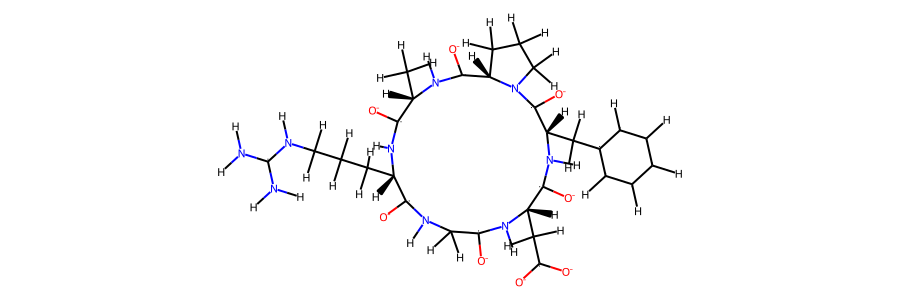

In [5]:
# Read in pdb file from amber
# mol_ref = Chem.MolFromPDBFile(pdb_amber, removeHs=False, proximityBonding=True) #removeHs=True, proximityBonding=True)
mol_ref = Chem.MolFromMol2File(
    mol_amber,
    removeHs=False,
)
mol_ref.RemoveAllConformers()
mol_ref

In [6]:
mol_ref.GetNumAtoms()

87

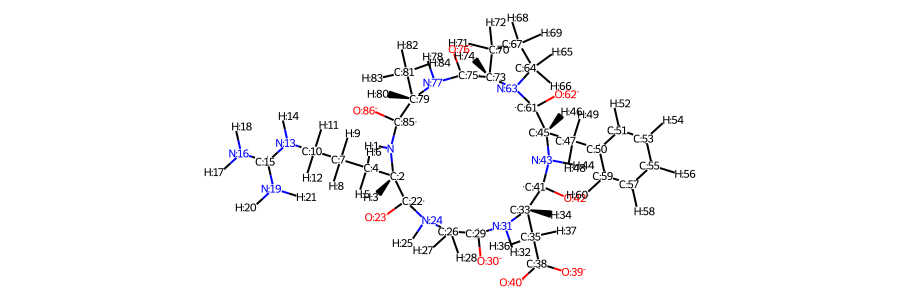

In [8]:
src.utils.mol_with_atom_index(mol_ref)

In [9]:
# Now the NOE assignment starts. Follow the instructions when running the below cells.
# Need to provide a csv file with the NOEs from the paper. The first two colums must be atom names, further columns
# should contain distances. The format can be specified below: D: distance, A: mAximum, I: mInimum, -: do not use.
# Also provide a scaling factor, s.t the NOEs are converted to Angstrom.

In [12]:
hist = {
    "Pro5 HbproR": [70],
    "Pro5 Ha": [73],
    "Ala6 Ha": [79],
    "Ala6 NH": [77],
    "Pro5 H2d*": [64],
    "Phe4 HbproR": [47],
    "Phe4 Ha": [45],
    "Arg1 HbproR": [4],
    "Phe4 H2b*": [47],
    "Gly2 H2a*": [26],
    "Arg1 NH": [1],
    "Phe4 NH": [43],
    "Phe4 HbproS": [47],
    "Asp3 NH": [31],
    "Asp3 H2b*": [35],
    "Arg1 HbproS": [4],
    "Arg1 Ha": [2],
    "Asp3 Ha": [33],
    "Gly2 NH": [24],
    "Ala6 CH3b": [81],
}
style = "AI-"
scaling = 0.01
# what seems off:

In [13]:
csv = "./data/external/raw_noes/50_trans.csv"
# NOE_a, *_ = src.noe.getNOE(mol_ref, csv, style=style, scaling=scaling)
NOE_a, *_ = src.noe.getNOE(mol_ref, csv, hist, style, scaling)

   Atom 1        Atom 2  NMR exp  lower bound  upper bound
0    (1,)         (78,)      0.0         2.77         3.00
1    (1,)          (3,)      0.0         2.43         2.54
2    (3,)        (5, 6)      0.0         2.71         2.93
3    (3,)        (5, 6)      0.0         2.61         2.75
4   (25,)          (3,)      0.0         2.14         2.18
5   (25,)      (27, 28)      0.0         2.22         3.79
6   (32,)         (34,)      0.0         2.66         2.87
7   (32,)      (36, 37)      0.0         2.40         3.30
8   (34,)      (36, 37)      0.0         2.42         3.32
9   (44,)         (32,)      0.0         2.34         2.40
10  (44,)      (48, 49)      0.0         2.29         2.35
11  (44,)      (48, 49)      0.0         3.15         3.39
12  (46,)      (65, 66)      0.0         2.08         3.03
13  (46,)      (48, 49)      0.0         2.82         3.05
14  (46,)      (48, 49)      0.0         2.45         2.63
15  (78,)      (48, 49)      0.0         3.15         4.

In [11]:
# now again for case b

In [25]:
hist = {
    "Arg1 H2d*": [10],
    "Arg1 HA": [2],
    "Asp3 HbproR": [35],
    "Asp3 HbproS": [35],
    "Pro5 HbproS": [70],
    "Asp3 H2b": [35],
    "Pro5 HbproR": [70],
    "Pro5 Ha": [73],
    "Ala6 Ha": [79],
    "Ala6 NH": [77],
    "Pro5 H2d*": [64],
    "Phe4 HbproR": [47],
    "Phe4 Ha": [45],
    "Arg1 HbproR": [4],
    "Phe4 H2b*": [47],
    "Gly2 H2a*": [26],
    "Arg1 NH": [1],
    "Phe4 NH": [43],
    "Phe4 HbproS": [47],
    "Asp3 NH": [31],
    "Asp3 H2b*": [35],
    "Arg1 HbproS": [4],
    "Arg1 Ha": [2],
    "Asp3 Ha": [33],
    "Gly2 NH": [24],
    "Ala6 CH3b": [81],
}
style = "AI-"
scaling = 0.01
# what seems off: Tyr2:CG?? Phe7(CG)

In [26]:
csv = "./data/external/raw_noes/50_cis.csv"
# NOE_b, *_ = src.noe.getNOE(mol_ref, csv, style=style, scaling=scaling)
NOE_b, *_ = src.noe.getNOE(mol_ref, csv, hist, style, scaling)

      Atom 1        Atom 2  NMR exp  lower bound  upper bound
0       (1,)         (80,)      0.0         2.38         2.44
1       (1,)  (82, 83, 84)      0.0         2.56         3.65
2       (1,)          (3,)      0.0         2.90         2.93
3       (1,)      (11, 12)      0.0         4.14         5.10
4      (25,)      (27, 28)      0.0         2.13         3.34
5      (25,)         (32,)      0.0         2.64         2.75
6      (32,)      (27, 28)      0.0         3.01         4.37
7      (32,)         (34,)      0.0         2.86         2.91
8      (32,)      (36, 37)      0.0         3.02         3.21
9      (32,)      (36, 37)      0.0         3.24         3.42
10     (32,)  (82, 83, 84)      0.0         3.33         4.29
11     (34,)      (36, 37)      0.0         2.60         3.50
12  (36, 37)  (82, 83, 84)      0.0         2.87         4.18
13     (44,)         (32,)      0.0         3.24         3.33
14     (44,)         (34,)      0.0         2.33         2.39
15     (

In [27]:
# # Need to output this / save this somehow!
# # Idea: save it as one line of a csv file in the interim folder

# # Store dataset in dataframe
# df = pd.DataFrame(columns=['smile','sequence','natural_cyclic_peptide','non_natural_cyclic_peptide', 'solvent', 'constraints'])
# df.loc[index] = [compound.smile, compound.sequence_1, compound.natural_cyclic_peptide, compound.non_natural_cyclic_peptide, compound.solvent, NOE_b]

# df.to_csv('./data/interim/22-02-2021_MacroConf-v2/' + str(index) + 'b.csv', header=False)

In [28]:
NOE_output = {"50a": NOE_a, "50b": NOE_b}

# save as .json file
with open(f"./data/interim/refactor-test/{index}/NOE.json", "w") as f:
    json.dump(NOE_output, f)